# Insuranse Claim Exploratory Data Analysis

## Dataset

* Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
* Sex :- This is the policy holder's gender, either male or female.
* BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
* Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.
* Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.
* Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
* Charges​ :- Individual medical costs billed to health insurance

Question to be answered

1. Are there more Male beneficary ?
2. Are there more smoker ?
3. Which region has maximum , medical cost billed to health insurance.?
4. What is age of beneficary.?
5. Do beneficary having more dependents had more medical cost billed.?

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid") # set the background for the graphs

In [2]:
df=pd.read_csv('insurance.csv')
insured=df.copy()

In [3]:
insured.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])
print ("\nFeatures : \n", insured.columns.tolist())
print ("\nMissing values :  ", insured.isnull().sum().values.sum())
print ("\nUnique values :  \n", insured.nunique())

Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [5]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Types of variables

* Categorical varibles - sex,smoker,region,children
* Quantitative variables -age,bmi,charges. Here children is a discrete variable where as age, bmi, and charges are continous variables.

There are no missing values

In [6]:
#changing object dtype to category  to save memory
insured.sex=insured['sex'].astype("category")
insured.smoker=insured['smoker'].astype("category")
insured.region=insured['region'].astype("category")

In [7]:
insured.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Observations

* Average age of the primary beneficiary is 39.2 and maximum age is 64.
* Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13
* Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770
* Median is less than mean in charges , indicating distrubution is postively skewed .
* Customer on an average has 1 child.
* For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted

In [8]:
insured.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


#### Observations

* 676 male and 662 female, indicated sample has slightly more males than females.
* 1064 nonsomker and 274 smoker, indicating sample has more nonsmokers.
* Number of claims from customer who reside in southwest region is more compared to other regions

## Exploratory Data Analysis

### Univariate Analysis

In [14]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.histplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
    plt.show()

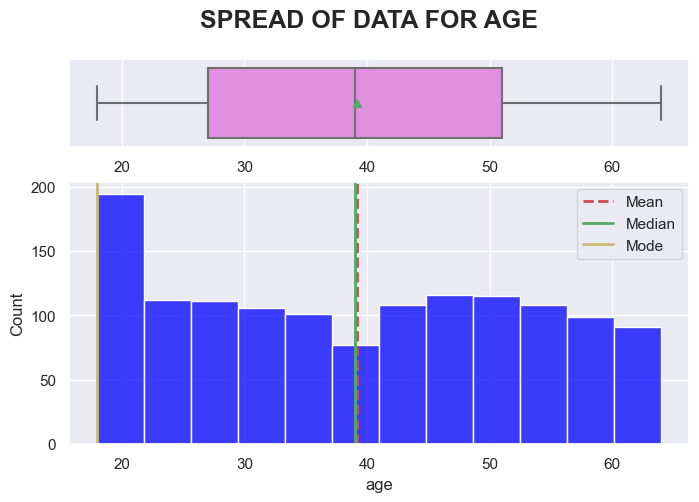

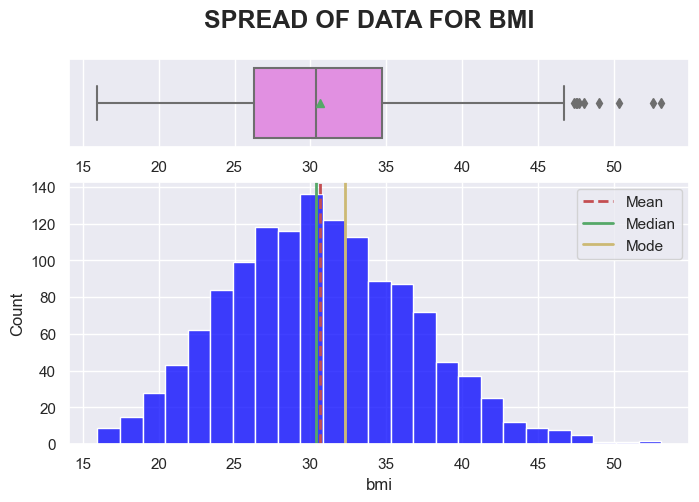

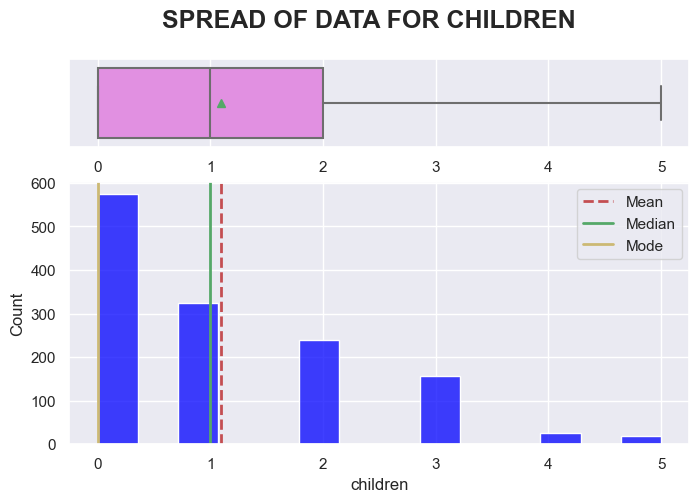

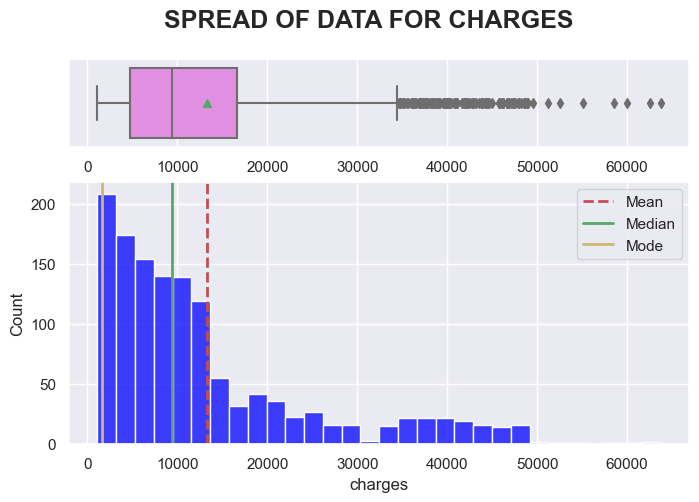

In [15]:
#select all quantitative columns for checking the spread
list_col=  insured.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(insured[list_col[i]])

#### Observations

* Age of primary beneficary lies approximately between 20 - 65 . Average Age is aprrox. 40. Majority of customer are in range 18- 20's.
* Bmi is normally distrubuted and Average BMI of beneficiary is 30.This BMI is outside the normal range of BMI. There are lot of outliers at upper end
* Most of the beneficary have no childrens.
* Charges distrubution is unimodal and is right skewed .Average cost insured to the insurance is appro. 130000 and highest charge is 63770.There are lot of outliers at upper end.

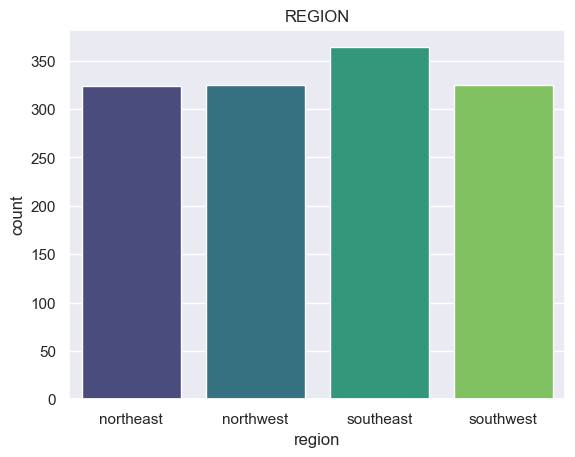

In [18]:
fig = plt.Figure(figsize=(5,5))
sns.countplot(data=insured,x='region',palette='viridis')
plt.title('REGION')
plt.show()

### Observation

* Beneficary are evenly distributed across regions with South East being the most populous one (~27%) with the rest of regions each containing around ~24%

## Bivariate & Multivariate Analysis

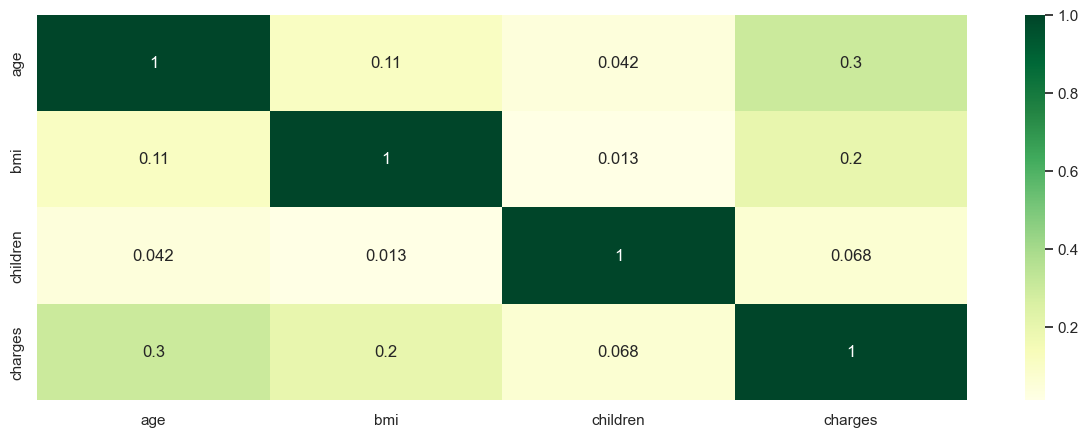

In [21]:
plt.figure(figsize=(15,5))
cu_columns=insured.select_dtypes(np.number).columns
sns.heatmap(insured[cu_columns].corr(),annot=True ,cmap="YlGn" )
plt.show()

#### Observation

There is very little significant correlation between charges Vs age and charges Vs bmi.

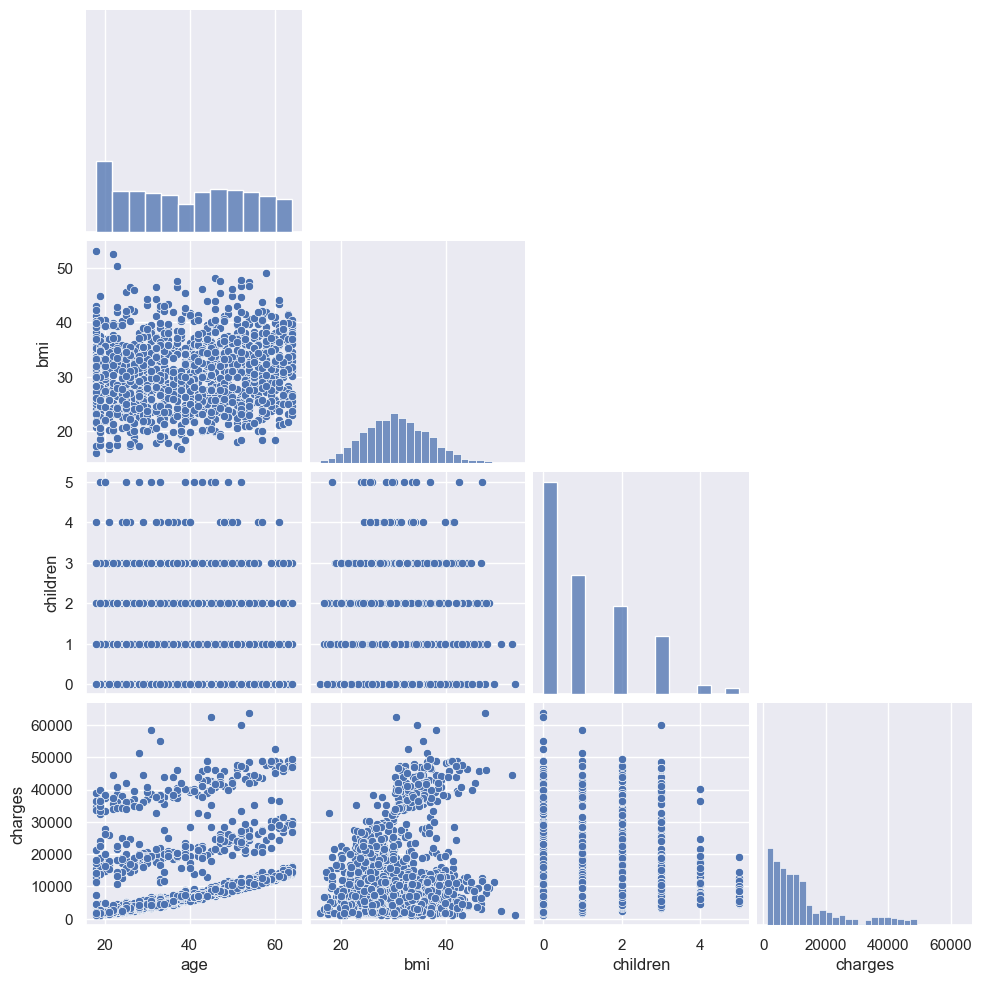

In [24]:
sns.pairplot(data=insured,corner=True)
plt.show()

[Text(0.5, 1.0, 'Smoker vs Sex')]

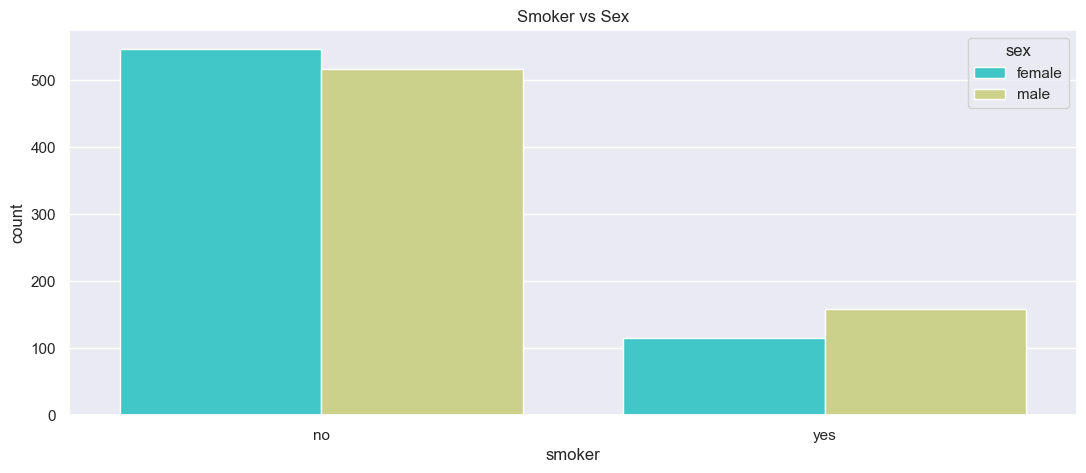

In [26]:
#smoker vs Sex
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=insured,palette='rainbow')
ax.set(title="Smoker vs Sex")

[Text(0.5, 1.0, 'Smoker vs Charges')]

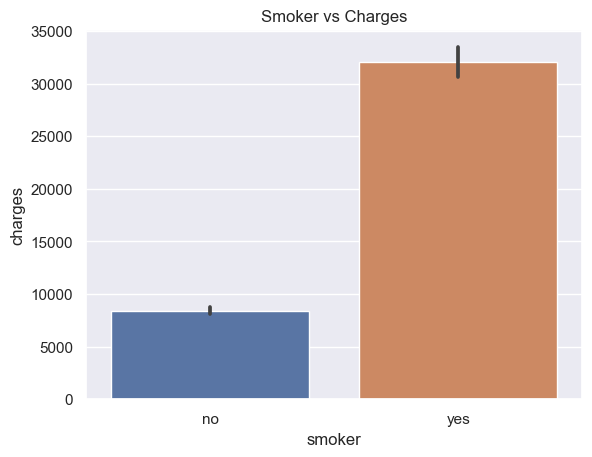

In [27]:
#smoker vs charges
sns.barplot(x=insured.smoker,y=insured.charges).set(title="Smoker vs Charges")

[Text(0.5, 1.0, 'Smoker vs Region')]

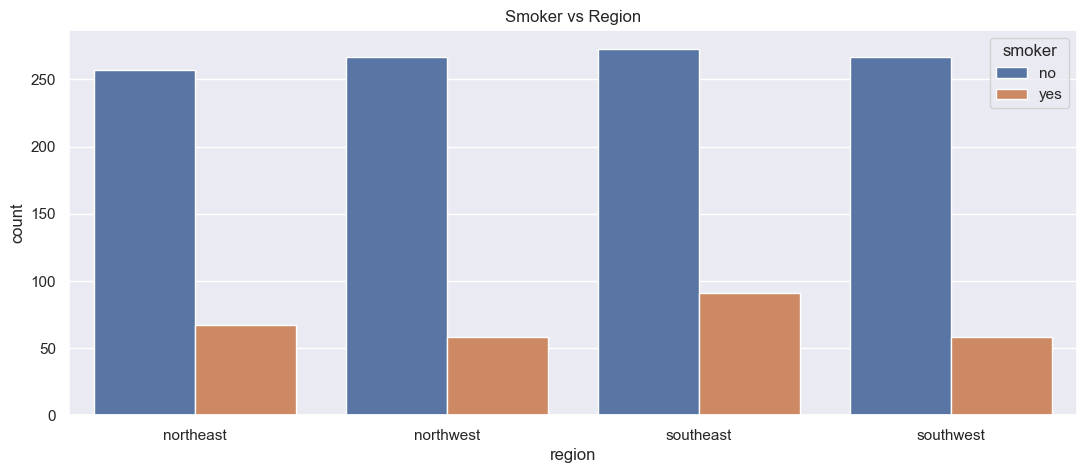

In [29]:
#region vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
ax.set(title="Smoker vs Region")

#### Observation

* There are more male smokers than female.
* Southeast region has more smokers
* Smoker have more costlier claims than nonsmoker.

[Text(0.5, 1.0, 'Children vs Charges')]

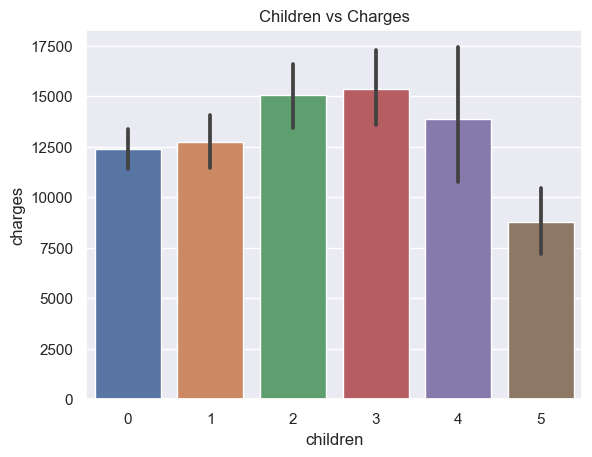

In [30]:
sns.barplot(x=insured.children,y=insured.charges).set(title="Children vs Charges")

[Text(0.5, 1.0, 'Sex Vs Charges')]

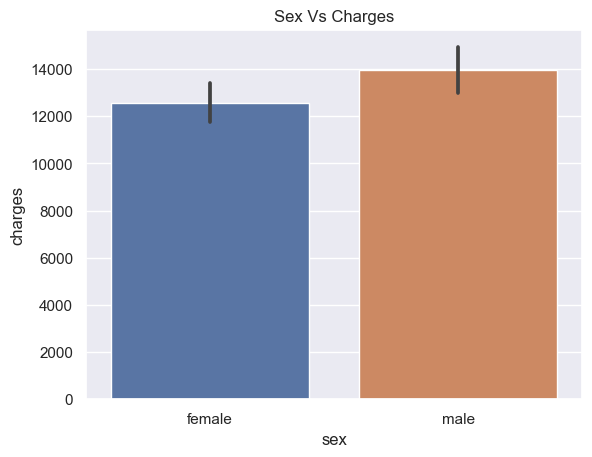

In [31]:
sns.barplot(x=insured.sex,y=insured.charges).set(title='Sex Vs Charges')

[Text(0.5, 1.0, 'Region Vs Charges')]

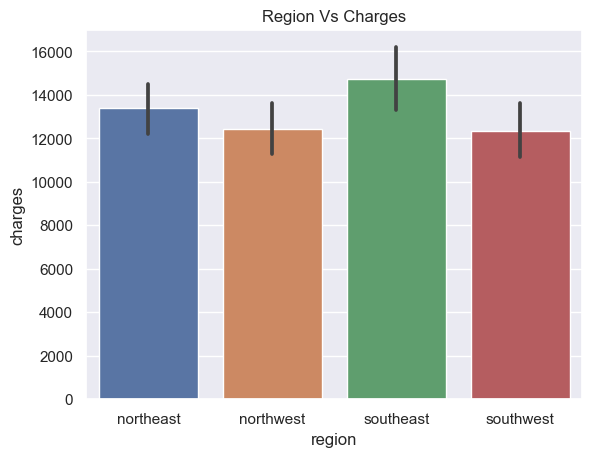

In [32]:
sns.barplot(x='region',y='charges',data=insured).set(title='Region Vs Charges')

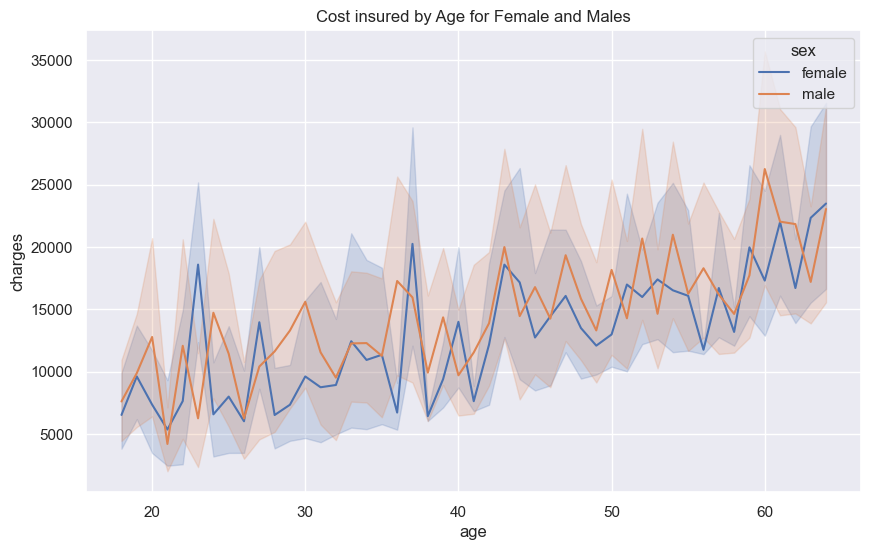

In [58]:
plt.figure(figsize=(10,6))
sns.lineplot(data=insured,x='age',y='charges',hue='sex')
plt.title('Cost insured by Age for Female and Males')
plt.show()

#### Observations

* Charges insured for males are more than charges insured for females
With increasing age of policy holder charges insured are going high for both male and female.
* There some spikes for female at an approximate ages of 23,28,43.
* Most claims are from southeast regions.

In [43]:
#creating groups of bmi
category=pd.cut(insured.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
insured.insert(5,'BMIGroup',category)
#creating groups of Age
category1=pd.cut(insured.age,bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])
insured.insert(6,'AgeBin',category1)

In [44]:
insured.head()

,age,sex,bmi,children,smoker,BMIGroup,AgeBin,region,charges
0,19,female,27.900,0,yes,25-35,18-28,southwest,16884.92400
1,18,male,33.770,1,no,25-35,NaN,southeast,1725.55230
2,28,male,33.000,3,no,25-35,18-28,southeast,4449.46200
3,33,male,22.705,0,no,15-25,28-38,northwest,21984.47061
4,32,male,28.880,0,no,25-35,28-38,northwest,3866.85520


[Text(0.5, 1.0, 'Age Vs Charges')]

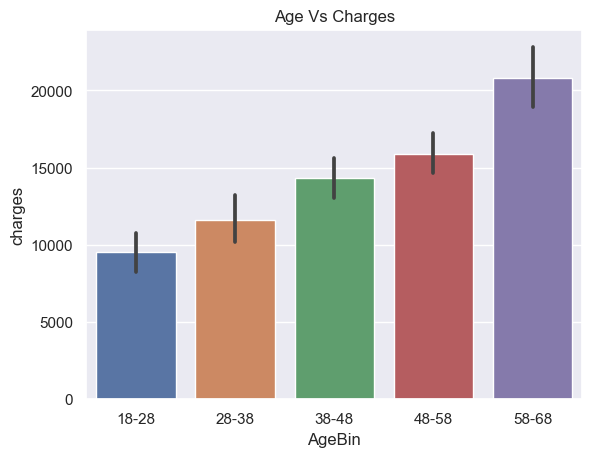

In [45]:
sns.barplot(x=insured.AgeBin,y=insured.charges).set(title='Age Vs Charges')

<Axes: xlabel='BMIGroup', ylabel='charges'>

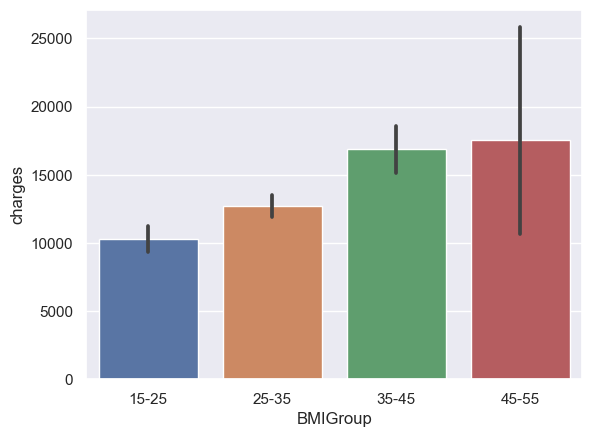

In [46]:
sns.barplot(x=insured.BMIGroup,y=insured.charges)

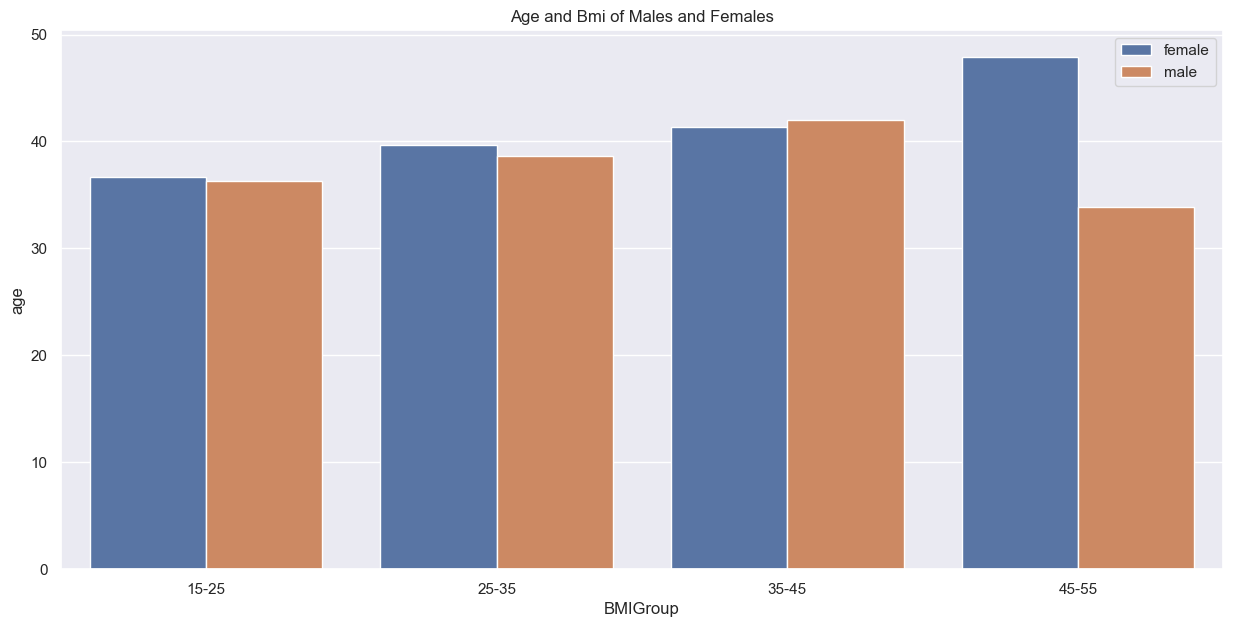

In [48]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["BMIGroup"],y=insured["age"],hue=insured['sex'],errorbar=('ci',0)).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Fig 2:BMI group and Charges ')]

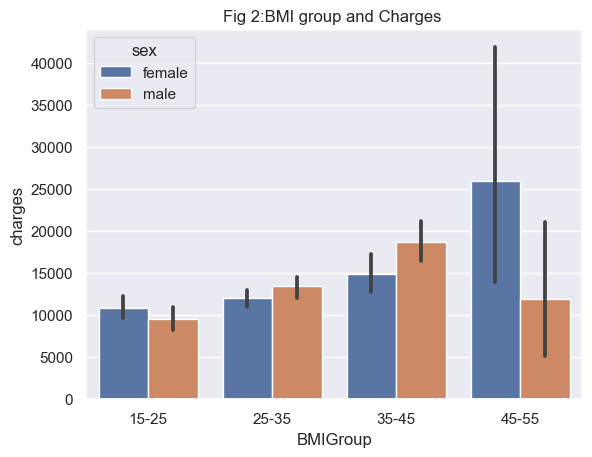

In [49]:
sns.barplot(x='BMIGroup',y='charges',hue='sex',data=insured).set(title="Fig 2:BMI group and Charges " )

### Observations

* Females with most BMI has insured most charges to the insurance company
* BMI for male and females are not same
* Beneficary with higher BMI have insured more cost to insurance

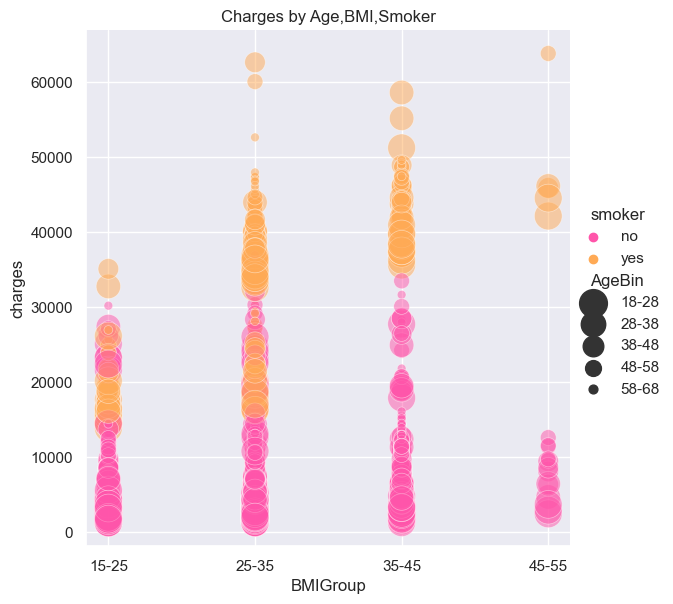

In [50]:
sns.relplot(x=insured.BMIGroup, y=insured.charges, hue=insured.smoker, size= insured.AgeBin,
            sizes=(40, 400), alpha=.5, palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');

#### Observation


As age increased claims increased -Smoker have higher medical claims

## Conclusion based on EDA
* As expected , as the age of the beneficiary increases ,the cost to insurance increases.
* Males who smoke have most claims and have higher bills.
* Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.
* Beneficiary with 2 or 3 dependent have billed higher compared to others people who have 5.This is unusual and may be because of uneven number of observations in each group. For example, no dependents group has 574 observations whereas five dependents group only has 18.
* Customer with bmi >30 are on higher side of obesity, have more health issues and have higher claims.
* Females with BMI more than 45 have billed higher to insurance.
* Age, BMI and Smoking are important attributes which can cost insurance company more.